# Optimisation Methods: A Brief Overview




## (1) Unconstrained

### Descent Algorithms: General
- Given  $$\min{x} f(x),$$


- Descent algorithms generally **pick directions $p_k$ (and step-size $a_k$) iteratively** such that $f(x_k + \alpha_k p_k) < f(x_k)$, for some $\alpha_k > 0$. 



- **Direction $p_k$ selection**: Depending on how to find $p_k$, there are many variants such as Gradient Descent, Conjugate Gradient, Newton, etc..

- **Step-size $\alpha_k$ selection**: This becomes the minimisation problem called **Line Search**: 
$$\min_{ \alpha_{k} > 0} f(x_k + a_k p_k)$$

    - But, if we want to find $a_k$ exactly at once, then this problem is expensive. So, we need clever ways (i.e. solve it approximately and cheaply -- called **Inexact line search**).

    - **Backgracking**
    - (Not completed yet)

- The update direction and step size are the primary things that motivated multiple variants of descent algorithms. 

- Materials to read
    - [CMU lecture](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/Descent-Line-Search.pdf)
    

### [Gradient Descent](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/Gradient-Descent.pdf)

- **Direction**: $p = -\frac{\nabla f_k}{\| \nabla f_k \|}$ (unit direction $p$ with most rapid decrease; first-order method that uses gradient)

- "Gradient method is often **slow**; convergence varies depending on scale". As this method relies on **local information**.
    
- "Gradient method does not handle **non-differentiable problems**"

- **Other methods with improved convergence**

    - quasi-Newton methods
    - conjugate gradient method
    - accelerated gradient method

- **Other methods for nondierentiable or constrained problems**

    - subgradient method
    - proximal gradient method
    - smoothing methods
    - cutting-plane methods

    

### [Newton](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/Newton_methods.pdf) 

- **Direction**: Second-order method that uses Hessian as well

- Thus, can find a better direction than Gradient (i.e. **faster**). 

- However, may be difficult to obtain the Hessian. 

- The following figure shows an exmaple performance comparison btw **Newton vs Gradient**:



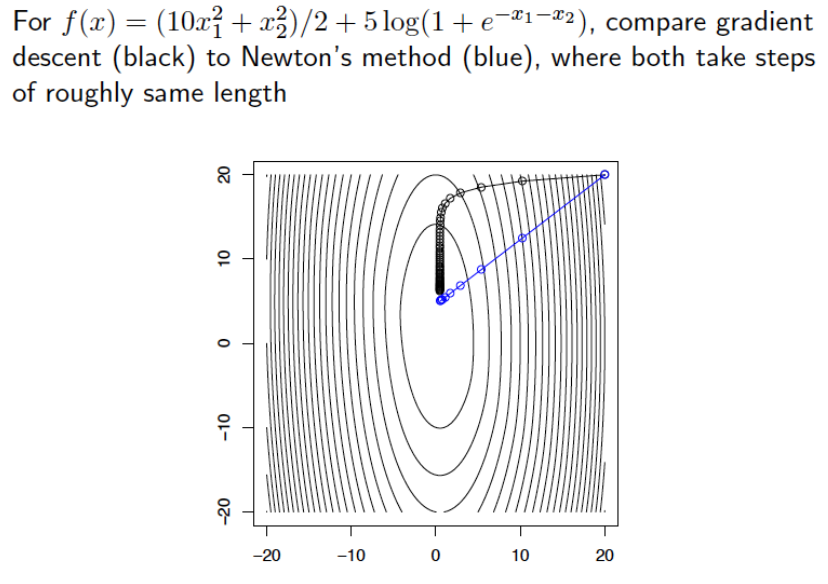

In [5]:
from IPython.display import display, Image
display(Image(filename='images/Gradient_Newton.png'))

### [Conjugate Gradient](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/conjugate_direction_methods.pdf) 

- Can be refered between Gradient and Newton


- Motivation: Gradient is slow; Newton is fast, but needs the inverse of the Hessian matrix

- "Conjugate gradient method attempts to accelerate gradient descent by building in **momentum**". Here the momentum implies **the tendency from the previous update**. 
        
- Comparison - Conjugate vs Gradient 



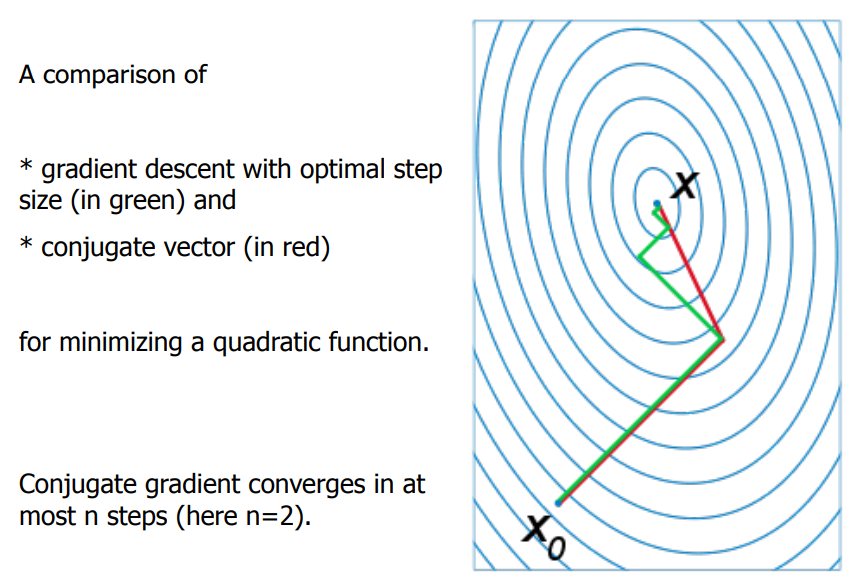

In [6]:
display(Image(filename='images/Congugate.png'))

### [Accelerated Gradient](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/acceleration.pdf)

- Motivation: Gradient relies on too much on local information to decide direction, and hence might be too slow w.r.t. convergence

- Adding momentum might improve it and prevent oscillation.

- e.g. Heavy ball method

- (Not fully understood)

### [Trust Region Methods](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/trust-region.pdf)

- **Step-size selection**: Restrict the step size to lie in **trust region**

- Line Search vs True Region

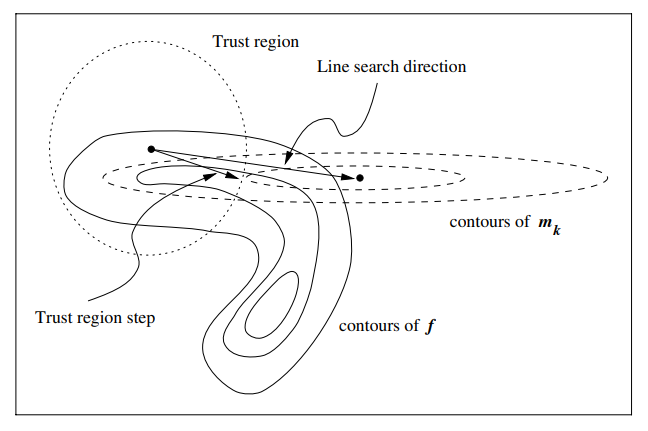

In [7]:
display(Image(filename='images/TR_LineSearch.png'))

### [Proximal Gradient Descent](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/prox-grad_2.pdf)

- **For non-differentiable** objective functions

- Suppose $$f(x) = g(x) + h(x)$$
    where

    - $g$ is convex, differentiable
    - $h$ is convex, not differentiable
        
- Roughtly speaking, minimises $h(u)$ plus a simple quadratic local model of $g(u)$ around $x$.  
    - (Not fully understood)

- This method is also called "composite gradient descent" or "generalised gradient descent". 
    - $h=0$ $\Rightarrow$ gradient descent
    - $h=I_C$ $\Rightarrow$ projected gradient descent (see below)
    - $g=0$ $\Rightarrow$ proximal minimisation algorithm

## (2) Constrained

### [Projected Gradient Descent](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/prox-grad_2.pdf)

- Transform $\min_{x \in C} g(x)$ 

   $\Rightarrow$ $\min_x g(x) + I_C{x}$


- Perform usual gradient update and then project back onto $C$

- This method seems to be for simple convex sets $C$. 


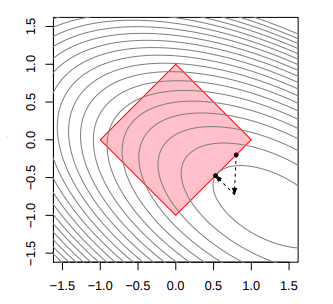

In [8]:
display(Image(filename='images/ProjectedGradient.png'))

### [The method of Lagrange multiplers](https://en.wikipedia.org/wiki/Lagrange_multiplier)

- A strategy to find the local maxima/minima of a function subject to **equality constraints**. 

$$\text{minimise} \ \ f(\mathbf{x})$$
$$\text{subject to:} \ \ g(\mathbf{x}) = 0$$


- The key idea is to convert a constrained problem into a form such that **the derivative test** of an unconstrained problem can still be applied (**$f(\mathbf{x})$ and $g(\mathbf{x})$ should be differentiable**)

- It is generalised by [the KKT conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions), which can also take into account **inequality constraints** of the form $h(\mathbf{x}) \le c$.

- How to do:

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda^{T} g(\mathbf{x})$$

$$ \nabla_{\mathbf{x},\lambda} L = \big( \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2},..., \frac{\partial L}{\partial \lambda}  \big) $$

<center> Find $\mathbf{x},\lambda$ such that $\nabla_{\mathbf{x},\lambda} L = (\mathbf{0}, 0)$ </center>

- It may address **inequality constraints**, see this [CMU Lecture](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/lagrange-multipliers.pdf)

### [Barrier Methods](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/barrier-methods.pdf)

- A constrained optimisation problem is converged to a series of unconstrained problems using:

    - A **barrier**: approaching boundary from interior (e.g. Barrier /Interior Point Methods)

    - A **penalty function**: adding a high cost to infeasibility (i.e. Penalty and Augmented Lagrangian Methods)


- Given, $$\text{minimise} \ \ f(\mathbf{x})$$
$$\text{subject to:} \ \ g(\mathbf{x}) \le 0$$ 
$$\ \ \ \ \ \ \quad \quad \ \ \ \mathbf{x} \in X$$

- Consider a **barrier function** that is continuous and goes to $\infty$ as any one of the constraints $g_j(x)$ approaches $0$ from negative values, for example, 

$$B(x) = -\sum_{\forall j} \frac{1}{g_j(x)}$$

- Then, a barrier method is to
 $$\text{minimise} \ \ f(\mathbf{x}) + \epsilon^k B(x)$$

   where $S = \{x \in X | g_j(x) < 0, \forall j\}$ (called interior set) and $0 < \epsilon^{k+1} < \epsilon^{k}$
   


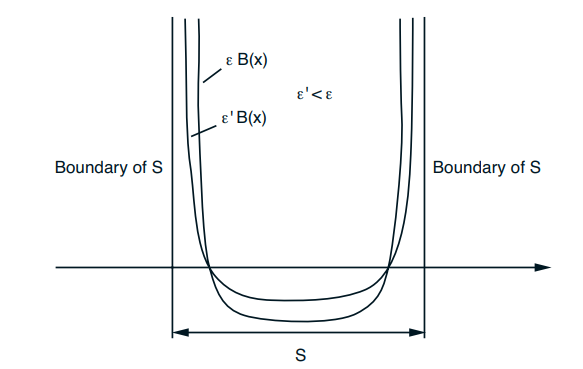

In [9]:
display(Image(filename='images/Barrier.png'))

   
- Barrier functions are only defined on the interior set $S$. So if we start at an interior point, successtive points will also be interior points. Hence, this method is also referred to as **interior point methods**. 

### [Augmented Lagrangian Method](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/Augmented-lagrangian.pdf)

#### Equality Constrained 

- Given the origianl problem (**equality constrained**):

$$ \min f(x) $$

$$ \text{subject to } c_i(x) = 0, \forall i$$

- This problem can be transformed, **by adding a quadratic penalty** instead of a barrier, to the following being with the same local minima:

$$\min \Phi_k(x) = f(x) + \frac{\mu_k}{2} \sum_{\forall i} c_i(x)^2$$

$$ \text{subject to } c_i(x) = 0, \forall i$$


- **The (just) penalty method** solves the following problem, then at the next iteration it re-solves the problem using a larger value of $\mu_k$ with the old solution as the initial guess:
    
    $$\min \Phi_k(x) = f(x) + \frac{\mu_k}{2} \sum_{\forall i} c_i(x)^2$$
    
- **The augmented Lagrangian method**, on the contrary, solves the following unconstrained problem:

    $$\min \Phi_k(\mathbf{x}) = f(\mathbf{x}) + \frac{\mu_k}{2} \sum_{\forall i} c_i(\mathbf{x})^2 + \sum_{\forall i} \lambda_i c_i(\mathbf{x})$$
    
    After each iteration, in addition to **updating $\mu_k$**, the **variable $\lambda_i$** is also updated by
    
    $$\lambda_i \leftarrow \lambda_i + \mu_k c_i(\mathbf{x}_k),$$ 
    where $\mathbf{x}_k$ is the solution to the unconstrained problem at the $k$-th step, i.e. $\mathbf{x}_k = \arg\min \Phi_k(\mathbf{x})$.
    
    
- Practical issues
    - $\mu_k$ should eventually become larger than the "threshold" of the given problem
    - $\mu_0$ should not be so large as to cause ill-conditioning at the first minimisation
    - $\mu_k$ should not be increased so fast that too much ill-conditioning is forced upon the unconstrained minimisation too early
    - $\mu_k$ should not be increased so slowly that the multiplier iteration has poor convergence rate. 
    - A good practical scheme is to choose a moderate value $\mu_0$, and use $\mu_{k+1} = \beta \mu_{k}$, where $\beta > 0$ (typically $\beta \in [5,10]$ if a Newton-like method is used). 
    
   

#### Inequality constrained 

- Given the origianl problem (**inequality constrained**):

$$ \min f(x) $$

$$ \text{subject to } c_i(x) = 0, \forall i$$
$$ \quad\quad\quad \ \ \  g_j(x) \le 0, \forall j$$


- Inequaltiy constaint $g_j(x) \le 0$ $\forall j$ can be converted to **equality constraint**:

$$g_j(x) + z_j^2 = 0, \quad \forall j$$


- Then, the objective function can become

    $$\Phi_k(\mathbf{x}, \mathbf{z}, \lambda, \mu_k) = f(\mathbf{x}) + \frac{\mu_k}{2} \sum_{\forall i} c_i(\mathbf{x})^2 + \sum_{\forall i} \lambda_i c_i(\mathbf{x})$$
    $$ + \sum_{\forall j} \{\frac{\mu_k}{2}(g_j(x) + z_j^2)^2 +  \lambda_j (g_j(x) + z_j^2) \}$$
    
- First, solve the unconstrained problem **with respect to $z$**:

    $$\bar{\Phi}_k(\mathbf{x}, \lambda, \mu) = \min_{z} \Phi_k(\mathbf{x}, \mathbf{z}, \lambda, \mu_k) = f(\mathbf{x}) + \frac{\mu_k}{2} \sum_{\forall i} c_i(\mathbf{x})^2 + \sum_{\forall i} \lambda_i c_i(\mathbf{x})$$
    $$ + \min_{z} \sum_{\forall j} \{\frac{\mu_k}{2}(g_j(x) + z_j^2)^2 +  \lambda_j (g_j(x) + z_j^2) \}$$    
    
- Then, minimise the following **with respect to $x$** (I need more study) 

    $$\min_{x} \bar{\Phi}_k(\mathbf{x}, \lambda, \mu) = f(\mathbf{x}) + \frac{\mu_k}{2} \sum_{\forall i} c_i(\mathbf{x})^2 + \sum_{\forall i} \lambda_i c_i(\mathbf{x})$$
    $$ + \frac{\mu_k}{2} \sum_{\forall j} \{ \max\{0, \lambda_j + \mu_k g_j(x)\}^2 - \lambda_j^2 \}$$
        
- Update parameters:

$$\lambda_i \leftarrow \lambda_i + \mu_k c_i(\mathbf{x}_k),$$ 
$$\lambda_j \leftarrow \max \{0, \lambda_j + \mu_k g_j(x_k) \}$$         

#### Benefits
- "The major advantage of the method is that unlike the penalty method, it is not necessary to take $\mu \rightarrow \infty$ in order to solve the original constrained problem. Instead, because of the presence of the Lagrange multiplier term, $\mu$ can stay much smaller, thus avoiding ill-conditioning" ([wiki](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method))

### [ADMM (Alternating Direction Method of Multipliers)](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/ADMM.pdf)



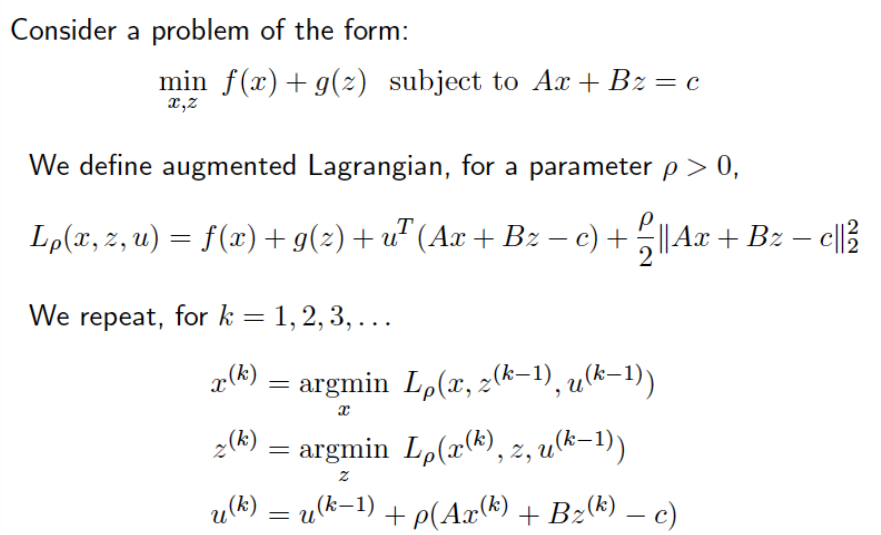

In [11]:
display(Image(filename='images/ADMM.png'))

- [Coordinate Descent](http://www.cs.cmu.edu/~pradeepr/convexopt/Lecture_Slides/coordinate_descent.pdf) seems similar to this 

## (3) Etc.. and not completed yet

### [KKT (Karush-Kuhn-Tucker) conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) (Not completed)

$$\text{minimise} \ \ f(\mathbf{x})$$
$$\text{subject to:} \ \ g(\mathbf{x}) = 0$$
$$\ \ \ \ \ \ \quad \quad \ \ \ h(\mathbf{x}) \le 0$$

- **First derivative tests**
- Similar to the Lagrange approach, the constrained maximisation problem is rewritten as a Lagrange function whose optimal point is a saddle point. 
- It generalises Lagrange multipliers, allowing **inequality constraints**


- Then, the subsequent **dual problem** is:
$$\text{minimise} \ \ L(\mathbf{x})$$
$$\text{subject to:} \ \ g(\mathbf{x}) = 0$$

$$L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda^{T} g(\mathbf{x}) + \mu^{T} h(\mathbf{x}) $$